# Project Title: Credit Card Fraud Detection

## Introduction

In an era where digital transactions are commonplace, the threat of credit card fraud looms large, posing significant challenges to both consumers and financial institutions. This project aims to tackle this pressing issue by applying advanced machine learning techniques to detect fraudulent activities in credit card transactions. By leveraging a comprehensive dataset from Kaggle, the project seeks to uncover patterns and anomalies indicative of fraud, thereby contributing to safer financial transactions.

## Objective

The primary objective of this project is to develop and evaluate machine learning models capable of accurately identifying fraudulent transactions in credit card data. This involves:

1. **Initial Data Exploration and Analysis (EDA)**: Conducting thorough EDA to understand the dataset's characteristics, including distribution of variables, presence of outliers, and inherent correlations.

2. **Model Development and Evaluation**:
   - **Custom MLP (Multilayer Perceptron) using PyTorch**: Designing and training a deep learning model to capture complex patterns and interactions in the data.
   - **XGBoost Classifier**: Utilizing the powerful gradient boosting framework to handle imbalanced data and improve predictive accuracy.
   - **Logistic Regression**: Implementing a baseline model for comparison, known for its simplicity and interpretability.

3. **Comparative Analysis**: Comparing these models based on various metrics like accuracy, precision, recall, and F1 score to determine the most effective approach for fraud detection.

## Dataset

The dataset utilized for this project is sourced from Kaggle (Credit Card Fraud Detection Dataset 2023), accessible at [Kaggle Dataset Link](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023). It comprises features related to credit card transactions, such as transaction amount, time, and merchant category, along with labels indicating whether a transaction is fraudulent.

## Potential Use Cases

1. **Credit Card Fraud Detection**: The primary use case, focusing on building models to detect and prevent credit card fraud.
2. **Merchant Category Analysis**: Exploring how different merchant categories correlate with fraudulent activities.
3. **Transaction Type Analysis**: Investigating the susceptibility of various transaction types to fraud, aiding in the development of targeted fraud prevention strategies.

Through this project, I aim to contribute significantly to the field of financial security, offering insights and tools to combat credit card fraud effectively.

# Import required libraries

In [2]:
#!pip install -q opendatasets

import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns  # For advanced data visualization

from sklearn.preprocessing import StandardScaler  # For scaling features to a standard range
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels as integers
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
import opendatasets as od  # For downloading datasets from online sources
import pandas as pd  # For data manipulation and analysis (DataFrame operations)
from sklearn.linear_model import LogisticRegression  # For performing logistic regression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score  # For calculating different evaluation metrics
from xgboost import XGBClassifier  # For using XGBoost, an optimized gradient boosting library
from sklearn.model_selection import cross_val_score  # For evaluating a model by cross-validation
import torch  # For building deep learning models using PyTorch
import torch.nn as nn  # For creating layers in PyTorch neural networks
import torch.optim as optim  # For using optimizers in PyTorch
from torch.utils.data import DataLoader, TensorDataset  # For handling and batching data in PyTorch
from sklearn.model_selection import train_test_split  # Duplicate import, used for splitting data (already imported above)


100%|██████████| 143M/143M [00:01<00:00, 132MB/s]


# Load data and initial analysis

In [2]:
od.download('https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/code?datasetId=3752264&sortBy=voteCount') # insert ypu kaggle
data = pd.read_csv('/content/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')

In [4]:
data.head().T

,0,1,2,3,4
id,0.000000,1.000000,2.000000,3.000000,4.000000
V1,-0.260648,0.985100,-0.260272,-0.152152,-0.206820
V2,-0.469648,-0.356045,-0.949385,-0.508959,-0.165280
V3,2.496266,0.558056,1.728538,1.746840,1.527053
V4,-0.083724,-0.429654,-0.457986,-1.090178,-0.448293
V5,0.129681,0.277140,0.074062,0.249486,0.106125
V6,0.732898,0.428605,1.419481,1.143312,0.530549
V7,0.519014,0.406466,0.743511,0.518269,0.658849
V8,-0.130006,-0.133118,-0.095576,-0.065130,-0.212660
V9,0.727159,0.347452,-0.261297,-0.205698,1.049921


# Exploratory Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [11]:
data.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [5]:
data['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [7]:
data.duplicated().any()

False

In [8]:
data.corr()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.000000,-0.395741,0.424267,-0.663655,0.617554,-0.268445,-0.387916,-0.414288,0.121282,-0.508427,...,0.097948,0.036106,0.017594,-0.116685,0.005586,0.052126,0.184195,0.086822,0.001710,0.864283
V1,-0.395741,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,...,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280,-0.505761
V2,0.424267,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,...,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076,0.491878
V3,-0.663655,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,...,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001,-0.682095
V4,0.617554,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,...,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859,0.735981
V5,-0.268445,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,...,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016,-0.338639
V6,-0.387916,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,...,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734,-0.435088
V7,-0.414288,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,...,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326,-0.491234
V8,0.121282,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,...,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208,0.144294
V9,-0.508427,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,...,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589,-0.585522


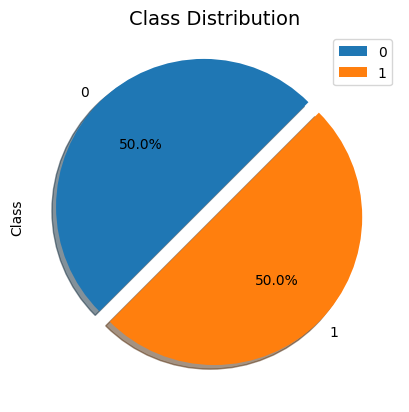

In [10]:
# Counting the values in the 'Class' column
class_counts = data['Class'].value_counts()

# Creating a pie chart with specific customizations
pie_chart = class_counts.plot.pie(explode=[0.1, 0], autopct='%3.1f%%', shadow=True, legend=True, startangle=45)

# Setting the title for the plot
plt.title('Class Distribution', fontsize=14)

# Displaying the plot
plt.show()

In [11]:
x = data.drop(columns=['id','Class'],axis=1)
target = data['Class']

In [13]:
x.shape, target.shape

((568630, 29), (568630,))

# Data preparation for modelling

In [15]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled,columns=x.columns)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled_df,target,test_size=0.25,random_state=42,stratify= target)

# Model 1: Logistic Regression

In [18]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Define different scoring metrics
scoring_metrics = {'accuracy': make_scorer(accuracy_score),
                   'precision': make_scorer(precision_score),
                   'recall': make_scorer(recall_score),
                   'f1': make_scorer(f1_score)}

# Perform 5-fold cross-validation for each metric
cv_results = {}
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(log_reg, x_scaled, target, cv=5, scoring=scorer)
    cv_results[metric_name] = scores

# Print the results
for metric, scores in cv_results.items():
    print(f"{metric}: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")


accuracy: 0.96 (+/- 0.00)
precision: 0.97 (+/- 0.01)
recall: 0.95 (+/- 0.00)
f1: 0.96 (+/- 0.00)


# Model 2: xGBoost Classifier

In [19]:
# Initialize XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define different scoring metrics
scoring_metrics = {'accuracy': make_scorer(accuracy_score),
                   'precision': make_scorer(precision_score, average='weighted'),
                   'recall': make_scorer(recall_score, average='weighted'),
                   'f1': make_scorer(f1_score, average='weighted')}

# Perform 5-fold cross-validation for each metric
cv_results = {}
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(xgb_clf, x_scaled, target, cv=5, scoring=scorer)
    cv_results[metric_name] = scores

# Print the results
for metric, scores in cv_results.items():
    print(f"{metric}: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")


accuracy: 1.00 (+/- 0.00)
precision: 1.00 (+/- 0.00)
recall: 1.00 (+/- 0.00)
f1: 1.00 (+/- 0.00)


# Model 3: Multilayer Perceptron

In [21]:
class CustomMLP(nn.Module):
    def __init__(self, input_size):
        super(CustomMLP, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.dropout(x)
        x = self.relu(self.layer3(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.layer4(x)) # Sigmoid for binary classification
        return x


In [22]:
# Convert to PyTorch tensors
x_tensor = torch.tensor(x_scaled, dtype=torch.float32)
y_tensor = torch.tensor(target, dtype=torch.float32)

# Create datasets
dataset = TensorDataset(x_tensor, y_tensor)

# Split into training and validation sets
train_dataset, val_dataset = train_test_split(dataset, test_size=0.2)

# Create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)


In [23]:
# Initialize the model
input_size = x_scaled.shape[1]
model = CustomMLP(input_size)

# Loss and optimizer
criterion = nn.BCELoss() # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    # Training phase
    model.train()
    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        outputs = outputs.squeeze() # Remove extra dimensions
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation phase
    model.eval()
    with torch.no_grad():
        total = 0
        correct = 0
        for inputs, labels in val_loader:
            outputs = model(inputs)
            outputs = outputs.squeeze() # Remove extra dimensions
            predicted = outputs > 0.5 # Classifying
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, '
          f'Validation Accuracy: {100 * correct / total:.2f}%')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(


Epoch [1/10], Loss: 0.0069, Validation Accuracy: 99.83%
Epoch [2/10], Loss: 0.0018, Validation Accuracy: 99.89%
Epoch [3/10], Loss: 0.0008, Validation Accuracy: 99.92%
Epoch [4/10], Loss: 0.0019, Validation Accuracy: 99.90%
Epoch [5/10], Loss: 0.0029, Validation Accuracy: 99.91%
Epoch [6/10], Loss: 0.0001, Validation Accuracy: 99.93%
Epoch [7/10], Loss: 0.0001, Validation Accuracy: 99.95%
Epoch [8/10], Loss: 0.0006, Validation Accuracy: 99.93%
Epoch [9/10], Loss: 0.0001, Validation Accuracy: 99.93%
Epoch [10/10], Loss: 0.0002, Validation Accuracy: 99.95%
